# Project: IMDB Movie DataBase Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

<a id='intro'></a>
## Introduction

### Dataset Description 

>**The IMDB Movie Database:** This data set contains information about 10,000 movies collected from The Movie Database (TMDb), and includes 10866 movies (rows) with 21 features (columns). The columns included in the table are: 

|S/N|Column|Description|
|:---|:-----------|:-----------|
       | 1. | id | This is the movie ID	
       | 2. |imdb_id | This is the IMDB movie ID	
       | 3. | popularity | This is the movie's popularity rating	
       | 4. | budget | This is the movie's budget
       | 5. | revenue | This is the box office revenue of a movie
       | 6. | original_title | The original movie title
       | 7. | cast	| The top-billed cast of the movie
       | 8. | homepage	| The homepage of the movie (if any)
       | 9. | director	| The name of the movie director
       | 10.| tagline | The tagline of the movie (if any)	
       | 11.| keywords	| Keywords related to the movie
       | 12.| overview	| Movie synopsis
       | 13.| runtime	| Movie duration in minutes
       | 14.| genres	| Genre of the movie
       | 15.| production_companies	| The production company 
       | 16.| release_date	| Release date of the movie
       | 17.| vote_count	| The vote count of the movie
       | 18.| vote_average	| Average vote for the movie
       | 19.| release_year	| Release year of the movie
       | 20.| budget_adj	| The movie budget adjusted for inflation
       | 21.| revenue_adj  | Movie revenue adjusted for inflation


### Questions for Analysis
>**Question 1:** What are the top 10 all-time highest grossing movies by revenue

>**Question 2:** What is the relationship between the movie budget and the box office revenue?

>**Question 3:** In which years are the most movies released?

>**Question 4:** Which movies are most popular and least popular based on their runtime?

>**Question 5:** Does runtime affect popularity rating?
    

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
pd.options.display.max_rows = 9999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

#code to inspect the first 10 lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Now, to find the number of rows and columns in our data
df.shape

(10866, 21)

In [6]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>**Observation**: All column names are in lower case and separated by underscore "_", hence, no need to rename

In [7]:
#Get the total number of missing values in the dataset
df.isnull().any(axis=1).sum()

8874

>**Observation**: There is a total of 8874 missing values

In [8]:
#Get the columns with missing values and their counts
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>**Observation**: 9 columns have missing values namely:
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production companies

>**Observation**: There are 10,866 rows and 21 columns in the data

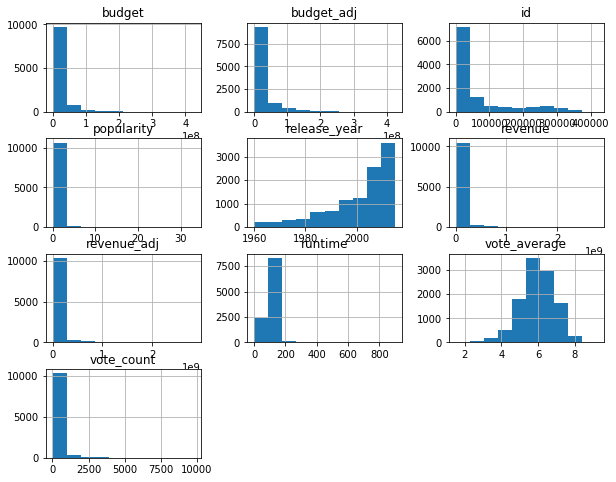

In [9]:
#View the histogram of the entire data
df.hist(figsize=(10,8));

>**Observation:** The "release_year" is skewed to the left, showing that most of the movies in the dataset are after year 2000

In [10]:
#Overview of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>**Observations**: 
* The highest runtime is 900 minutes, which seems pretty high - that is 15 hours. 
* The lowest runtime is 0 minutes, which seems off.
* The lowest budget is 0, which is unusual too.


In [11]:
#let's look at the movie with the runtime of 900 minutes
df.query('runtime == "900"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


>**Observation:**
 It is a documentary, makes sense!

In [12]:
#Check for duplicated values
sum(df.duplicated())

1

>**Observation:** There is only one duplicated item

In [13]:
#Inspect the items with no imdb_id
df[df.imdb_id.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


>**Observation**: All the movies with no imdb_id have no revenue and 90% 9/10 of them have no budget.  <br />
60% (6/10) of the movies are missing production companies and 80% (8/10) have no hompage <br />
Based on these we can drop the items

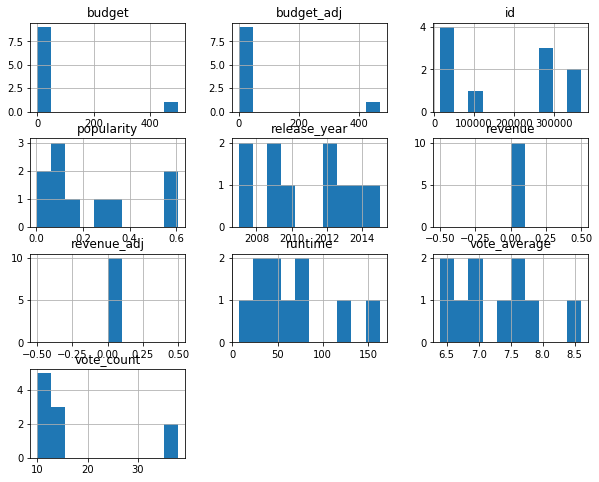

In [14]:
df[df.imdb_id.isnull()].hist(figsize=(10,8));


### Data Cleaning
>After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

In [15]:
#Drop duplicates
df.drop_duplicates(inplace=True);

In [16]:
#Confirm there are no  duplicates
sum(df.duplicated())

0

In [17]:
#Drop items/rows with missing imdb_id
df.dropna(subset=['imdb_id'],inplace=True)


In [18]:
#Confirm there are no more items with missing imdb_id
df.imdb_id.isnull().sum()

0

In [19]:
#Check the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [20]:
#Drop unnecessary columns
df.drop(columns=['homepage','tagline','cast','keywords','overview','production_companies', 'budget_adj', 'revenue_adj'],inplace=True)

In [21]:
#Get columns with missing values
df.isnull().sum()

id                 0
imdb_id            0
popularity         0
budget             0
revenue            0
original_title     0
director          40
runtime            0
genres            21
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [22]:
#Check the new data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 13 columns):
id                10855 non-null int64
imdb_id           10855 non-null object
popularity        10855 non-null float64
budget            10855 non-null int64
revenue           10855 non-null int64
original_title    10855 non-null object
director          10815 non-null object
runtime           10855 non-null int64
genres            10834 non-null object
release_date      10855 non-null object
vote_count        10855 non-null int64
vote_average      10855 non-null float64
release_year      10855 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What are the top 10 all-time highest grossing movies by revenue)

In [23]:
#Highest grossing movies with release year

#Group the movies by their "original_title" based on their revenues
df_topgross = df.groupby(['original_title', 'release_year'])['revenue'].max().reset_index()

#Sort the dataframe in descending order
df_topgross = df_topgross.sort_values('revenue', ascending=False)

#Show the top 10 movies
df_topgross.head(10)

,original_title,release_year,revenue
835,Avatar,2009,2781505847
7558,Star Wars: The Force Awakens,2015,2068178225
9982,Titanic,1997,1845034188
8045,The Avengers,2012,1519557910
4545,Jurassic World,2015,1513528810
3296,Furious 7,2015,1506249360
837,Avengers: Age of Ultron,2015,1405035767
3696,Harry Potter and the Deathly Hallows: Part 2,2011,1327817822
3277,Frozen,2013,1274219009
4317,Iron Man 3,2013,1215439994


### Research Question 2  (What is the relationship between the movie budget and the box office revenue?)

In [24]:
#   compare correlation between budget and revenue
df.budget.corr(df.revenue)

0.7348946137944063

>**Observation**: There is a strong correlation between movie budget and revenue

In [25]:
#Define function to visualize scatter plot

def  format_scatter_plot(x, y, xlabel, ylabel, title):
     ax = plt.subplot(1,1,1)
     ax.scatter(x,y)
        # giving X and Y labels
     ax.set_xlabel(xlabel, fontsize=16)
     ax.set_ylabel(ylabel, fontsize=16)
        # giving title to the plot
     ax.set_title(title, fontsize=20)
           
# visualizing the plot    
plt.show()  

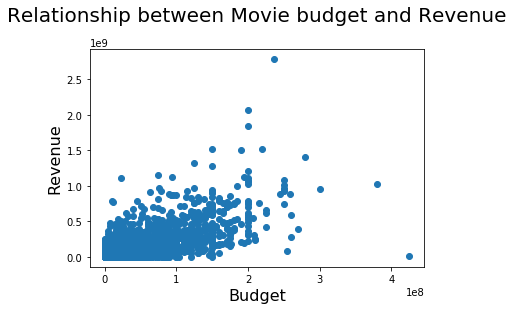

In [26]:
#scatter plot to show relationship between movie budget and revenue
format_scatter_plot(df.budget, df.revenue, 'Budget','Revenue',"Relationship between Movie budget and Revenue\n")

### Research Question 3  (In which years are the most movies released?)

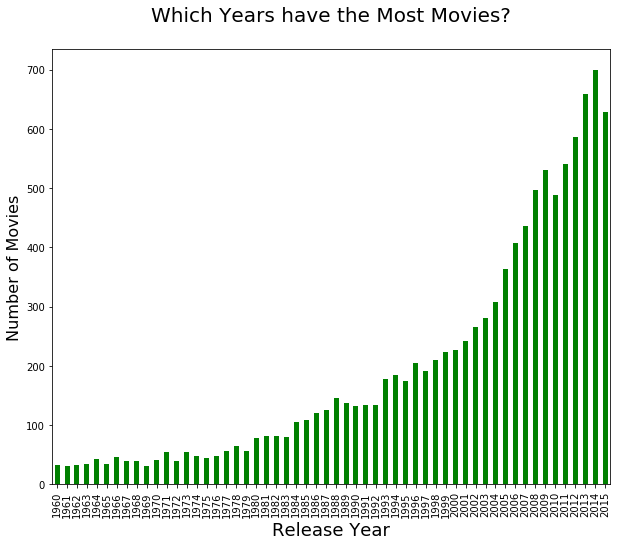

In [27]:
df.groupby('release_year')['id'].count().plot(kind='bar',figsize=(10,8), color="green");

# giving title to the plot
plt.title("Which Years have the Most Movies?\n", fontsize=20)
      
# giving X and Y labels
plt.xlabel('Release Year', fontsize=18)
plt.ylabel('Number of Movies', fontsize=16)
      
# making the plot visible
plt.show()

>**Observation**: Most movies in this dataset were released in **2014**

### Research Question 4  (Which movies are most popular and least popular based on their runtime?)

In [28]:
#First, we create categories for the runtime i.e. between 0 and 1 hour, between 1 and 2 hours, etc
#Create groups for runtime
runtime_groups=[0,60,120,180,240,900]
df['runtime_levels']=pd.cut(df.runtime,labels=['One hour or less','1-2 hours','2-3 hours','3-4 hours','4 hours and above'],bins=runtime_groups)

#print out mean popularity values of runtime groups
df.groupby('runtime_levels').mean()['popularity']


runtime_levels
One hour or less     0.336058
1-2 hours            0.575229
2-3 hours            1.172485
3-4 hours            0.675365
4 hours and above    0.266421
Name: popularity, dtype: float64

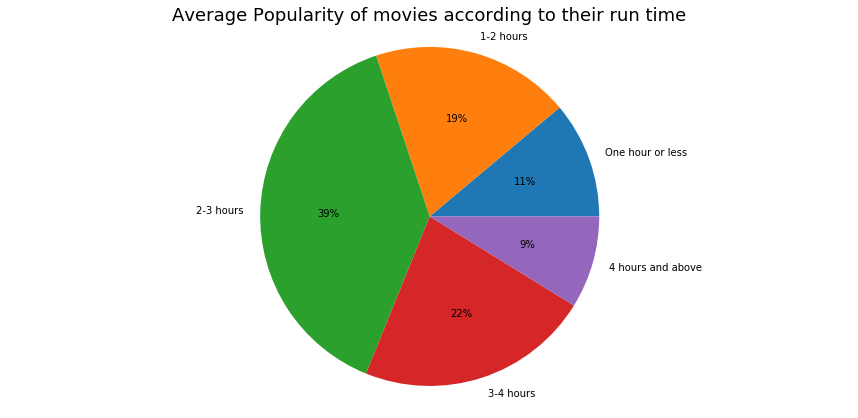

In [29]:
#Next, we create a pie chart to show the distribution of movies runtime based on popularity

plt.figure(figsize=(15,7))
df.groupby('runtime_levels').mean()['popularity'].plot(kind='pie',fontsize=10, autopct='%1.0f%%')

# giving title to the plot
plt.title("Average Popularity of movies according to their run time",fontsize=18)


#Hide the y-axis label
plt.ylabel('')

#To make the pie appear as a circle
plt.axis('equal')

# making the plot visible
plt.show()




>**Observation**: The plot above shows that movies with runtime between 2 and 3 hours are the most popular while movies with runtime of 4 hours and above are the least popular

### Research Question 5 (Does runtime affect popularity rating?)

In [30]:
df.runtime.corr(df.popularity)

0.13885859895055927

>**Observation**: The value is closer to zero (0) than 1, hence, little correlation between a movie's runtime and popularity rating

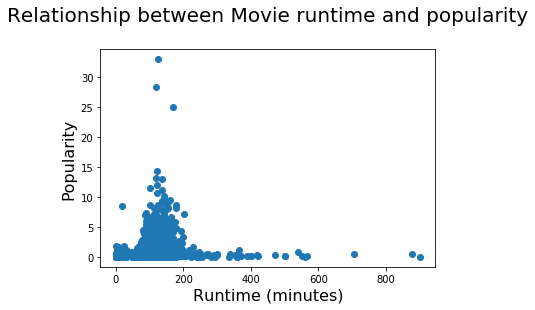

In [31]:
#Let's see the plot
format_scatter_plot(df.runtime, df.popularity, 'Runtime (minutes)','Popularity',"Relationship between Movie runtime and popularity\n");

<a id='conclusions'></a>
## Conclusions

> **Summary of Observations**: <br />
The following observations were noted in this analysis: 
- There were 10866 movies with 21 columns
- There were 9 columns with missing values namely:
        imdb_id
        cast
        homepage
        director
        tagline
        keywords
        overview
        genres
        production companies
- There was only one duplicate item
- The movie with the longest runtime is a documentary
- The top 10 grossing movies with their release year are:
       1. Avatar	(2009)
       2. Star Wars: The Force Awakens	(2015)
       3. Titanic	(1997)
       4. The Avengers	(2012)
       5. Jurassic World	(2015)
       6. Furious 7	(2015)
       7. Avengers: Age of Ultron	(2015)
       8. Harry Potter and the Deathly Hallows: Part 2	(2011)
       9. Frozen	(2013)
       10. Iron Man 3	(2013) 
- There is a strong correlation between movie budget and revenue
- Most movies in this dataset were released in **2014**
- Movies with runtime between 2 and 3 hours are the most popular while movies with runtime of 4 hours and above are the least popular
- There is little correlation between a movie's runtime and popularity rating









For further research on this analysis please check [this link](https://www.kaggle.com/code/unofficialmerve/imdb-exploratory-data-analysis) and [this one](https://towardsdatascience.com/investigating-a-dataset-using-pandas-and-seaborn-d83140603cf7)



### Limitations
> I could not use seaborn. 



## Submitting your Project 



In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0